# Notebook 1: Why is Machine Learning difficult?

## Overview 

In this notebook, we will get our hands dirty trying to gain intuition about why machine learning is difficult. 

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$
We will return to this in later notebooks. For now, we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.


# Training the models:

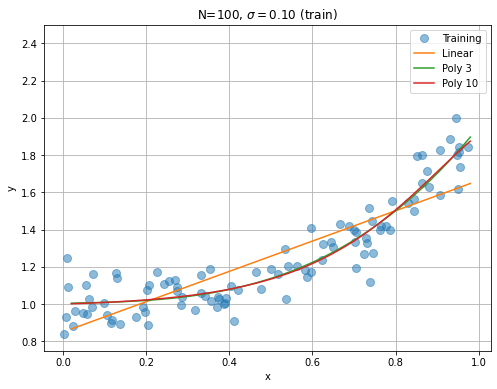

[1.41679422 1.4269464  1.12681292]


In [58]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=100
sigma_train=0.1;

# Train on integers
x=np.random.uniform(0,1,100)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=1+x**3+s

# Tenth Order
#y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.Ridge(alpha=0,solver='saga')

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.Ridge(alpha=0,solver='saga')
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.Ridge(alpha=0,solver='saga')
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([0.75,2.5])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()



# Testing the fitted models

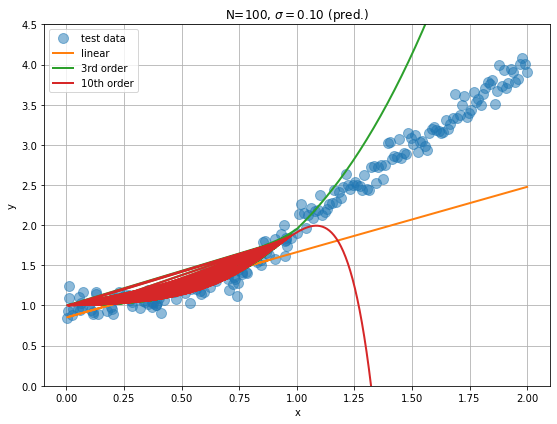

In [63]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=100
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=2
x_test= np.linspace(1,2,100)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot= np.concatenate((x,x_test))
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

y_p = np.concatenate((y, y_test))
data = np.concatenate((x,x_test))

p1=plt.plot(data, y_p, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((0,4.5))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

# Solutions for the Notebook 1 start at this point <br>
Yi Ming Chang <br>
B00751897

In [3]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams

# Part 1: Linear Order
We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? What can go right and what can go wrong?

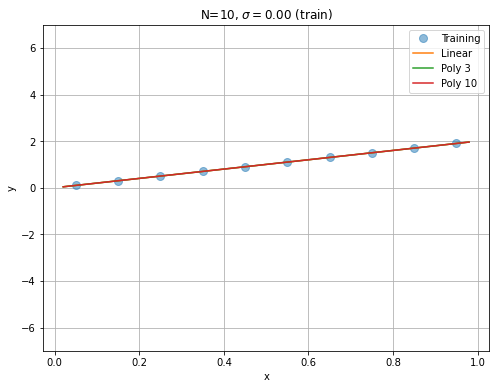

In [4]:
fig = plt.figure(figsize=(8, 6))
# The Training Data
N_train=10
sigma_train=0;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=2*x+s

# Tenth Order
#y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


I would like to say the linear order polynomial fits the data the best, since our function $f(x)$ is a linear function and it is a noiseless case. However, base on the graph we have above, it is hard to determine which gives the best model fits. Since they classes of models overlap together. 

I don't think the least error on the training set will also make the best predictions to the data. We know normaly the error on the training set is smaller than the error on the testing set, but this does not provide if you obtian least error on training set will make the best predictions. Fitting and predicting are very different things. Fitting is trying to fit a model to a dataset and analyzing the accuracy. From the code we can see that fitting needs to take output/data as input to find the best fit of the dataset. Predicting is trying to predict a dataset through a model, it does not take dataset as input. Also, there are using different dataset, one is train data set, the other is test data set. In addition from the Mehta Reading we learn, "The model providing the best explanation for the current dataset probably will not provide the best explanation for future datasets." Therefore, predicting and fitting are very different things. <br>

But I know to decrease the error we need to increase the number of points in our dataset. I think it might possible the greater error on the training set, the better predictions we would acquire. Also, if there is noiseless, it is possible the least error on the training set will also make the best predictions, but I am not sure why.

<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 

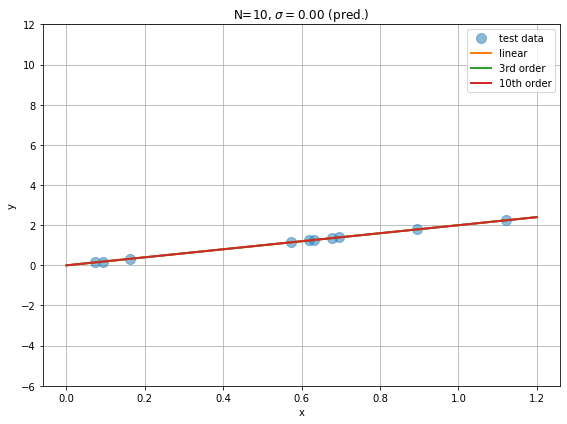

In [5]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=10
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

It seems like we have a good fitting and predicting. My guess it is because we do not have Gaussian Noise in this case. All fits predict newly generated test data perfectly, including on data outside the range that I fit on.

<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?

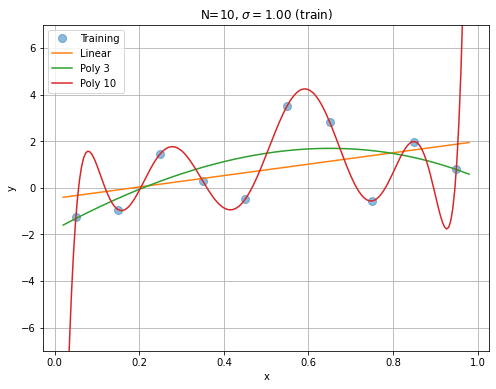

In [6]:
fig = plt.figure(figsize=(8, 6))
# The Training Data
N_train=10
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=2*x+s

# Tenth Order
#y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


All three classes of fitting models do not overlap together and they are not linear anymore. The error on linear and third order increased when we have $\sigma$ = 1. The tenth-order polynomial regression becomes the best fit to the training dataset, becasue it goes through all of the data.

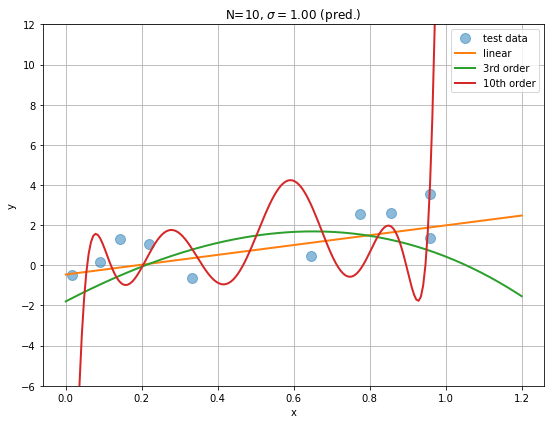

In [7]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=10
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

The best fit (tenth order polynomial regression) does not make the best predictions, which shows my answer is correct for in previous section. It seems like the linear regression is our best prediction to the test dataset with $\sigma$ = 1 in function $f(x) = 2x$. Since it is only one captures the points outside the original training data set (𝑥∈[0,1.2]). However, the accurage of predictions in the range of 𝑥 is still no as good as $\sigma$ = 0 for all polynomial regression.

<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?

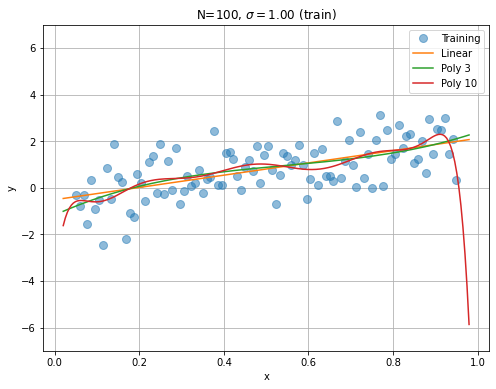

In [8]:
fig = plt.figure(figsize=(8, 6))
# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=2*x+s

# Tenth Order
#y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()

After increasing the number of data, the error on the training set decreases for all of the models, tenth order polynomial regression especially.

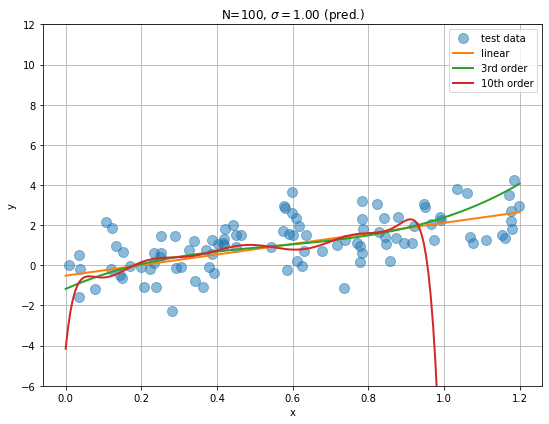

In [9]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=100
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

None of the models' prediction is actually capture the points the outside the original training data set, but overall the fits predict test data is better compare N = 10 (data points). And the model of tenth order is a bit overfitting to the test dataset, other than that the three classes of models predict the points on 𝑥∈[0,1] quite well.

<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

I learned the increased number of parameters ($\sigma$ Gaussian nosie) have prominent changes on both goodness of fit on training data and the ability to predict. I think it will decrease the accuracy of both fitting and predictions with same number of points. The number of data points increased would also increase on the accuracy of both fitting and prediction. Futhermore, the best fit to the training data does not mean it would have better predictions on the test data. Overall, number of parameters and data points are the main factor to change the result of fitting and prediction on training data set and test data set. 

Linear order regression works well in all time, I think it is due our true model that is linear. I found the pattern of each class of model is very similar on both graphs (train and prediction). I am not sure if this is relevant to the question.

# Part 2: Tenth order 
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0,1$. Record your observations.

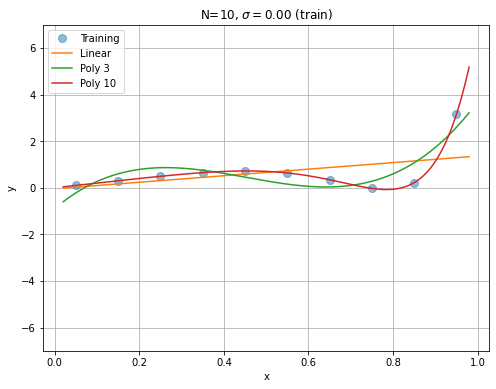

In [10]:
fig = plt.figure(figsize=(8, 6))
# The Training Data
N_train=10
sigma_train=0;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
#y=2*x+s

# Tenth Order
y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
#filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


All the models work fine, there is no overfiting or extremely weird fitting inside the plot. The tenth order model fits the training dataset the best under $N_{train}$ = 10 with $\sigma$ = 0. The linear and third order model are having some biases in the plot.

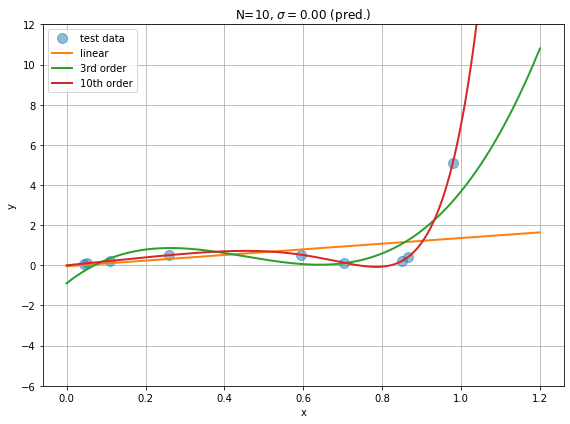

In [11]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=10
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
#y_test=2*x_test+s_test
# Tenth order
y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
#filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
filename_test="pred-o10=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

All the models predict well to the test dataset, expect the linear order does not capture the last point really well. The best fit makes the best prediction in this case, since the tenth order predicts every points in the test data set where you can observe from the plot.

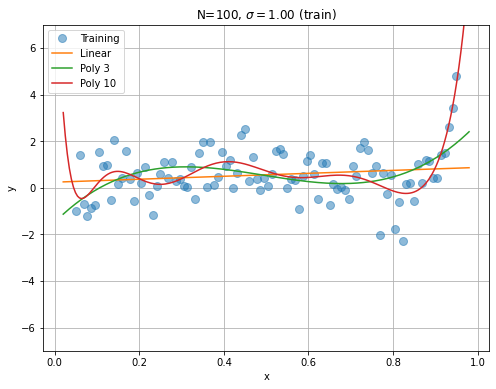

In [12]:
fig = plt.figure(figsize=(8, 6))
# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05, 0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
#y=2*x+s

# Tenth Order
y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')

# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')

# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

# Fifth order polynomial in case you want to try it out
#poly5 = PolynomialFeatures(degree=5)
#X = poly5.fit_transform(x[:,np.newaxis])
#clf5 = linear_model.LinearRegression()
#clf5.fit(X,y)

#Xplot=poly5.fit_transform(xplot[:,np.newaxis])
#plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
#filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


The accuracy of fitting in each model increases as the number of training points increases. The tenth order model still fits the best. 

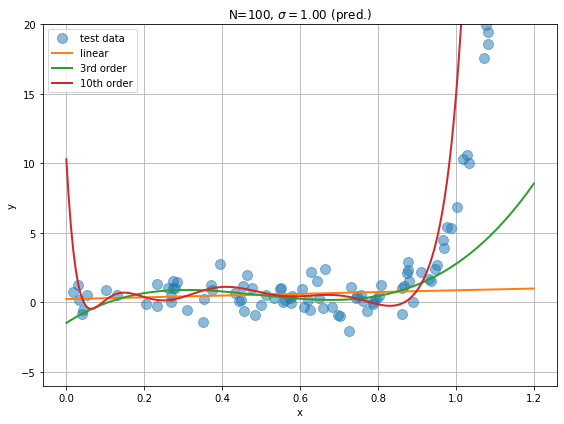

In [14]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=100
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
#y_test=2*x_test+s_test
# Tenth order
y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,20))

# Linear Filename
#filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
filename_test="pred-o10_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()

The tenth order model is the best fit in all range of $x$. It predicts the value inside and outside of the value of $x$. The linear and third order model predict a good result in $x \in [0,1]$.

<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?

Yes, the better fits lead to better predictions for this true model ($f(x)=2x-10x^5+15x^{10}$). The relationship between the true model and the model class of the best prediction has the same order of polynomial. The tenth order model class is any polynomial up to tenth order and $f(x)$ is also tenth order. Somehow, I found third order model has better fitting and prediction than linear order model. I guess it is because we have high order of polynomial. So, when the order of a model gets closer to the true model $f(x)$ will fit and predict the data set better. I found the increased $N_{train}$ will change the accuracy of the fitting and prediction to the model classes. And when adding $\sigma$ inside the dataset, the error of all model classes increase, becasue the noise data increases.


<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.

I think if the order of true model and model class match, the best prediction we got. In high order polynomial, the better fits lead to better prediction. In both question 1 and 2, I find the shape of each model in these two plots are very similar to each other (the fitting curve and predicting curve are very similar). The increase of number of point will not effect on the best model, but still will increase the accuracy overall to the model classes. The higher $\sigma$ we have, the bigger error that we would obtian for every model class because it will increase the noise of the dataset.

Overall, $N_{train}$ controls the accuracy of the result, $\sigma$ controls the noise/error of the data to the fitting and prediction, for all model classes.

ADR: 2/2